In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate


plt.rcParams.update(
    {
        "mathtext.fontset": "cm",
        "font.family": "STIXGeneral",
        "legend.fontsize": 16,  # this is the font size in legends
        "xtick.labelsize": 16,  # this and next are the font of ticks
        "ytick.labelsize": 16,
        "axes.titlesize": 16,
        "axes.labelsize": 20,  # this is the foflags.N of axes labels
        "savefig.format": "pdf",  # how figures should be saved
        "legend.edgecolor": "0.0",
        "legend.framealpha": 0.0,
        # "text.usetex": True,
    }
)

plasmamap = plt.get_cmap("plasma")
RdBumap = plt.get_cmap("RdBu")
virimap = plt.get_cmap("viridis")

## Figure 5A

In [6]:
data = np.load("fig5a_data.npz", allow_pickle=True)

<>:42: SyntaxWarning: invalid escape sequence '\D'
<>:42: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mq/p5kn27bn3j927psc4z_49npm0000gn/T/ipykernel_27972/2501863573.py:42: SyntaxWarning: invalid escape sequence '\D'
  -0.9, eb_id * 2 - 0.5, f"$\Delta E_B={data["eb"][eb_id]:.1f}$", fontsize=14


(-1.5, 1.0)

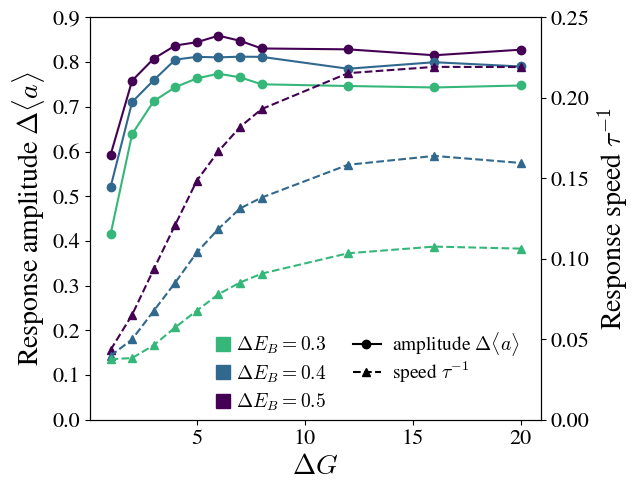

In [7]:
fig, ax = plt.subplots(figsize=(6.5, 5), tight_layout=True)
ax2 = ax.twinx()
# DeltaG_list[0] = 10

for _ in range(len(data["eb"])):
    ax2.plot(
        data["DeltaG"],
        data["speed"][_],
        "^--",
        # label=f"$\Delta E_B={data["eb"][eb_id]:.1f}$",
        color=virimap(_ / len(data["eb"])),
    )
    ax.plot(
        data["DeltaG"],
        data["amplitude"][_],
        "o-",
        # label=f"$\Delta E_B={data["eb"][eb_id]:.1f}$",
        color=virimap(_ / len(data["eb"])),
    )

ax.set_xlabel(r"$\Delta G$")

ax2.set_ylabel(r"Response speed $\tau^{-1}$")
ax.set_ylabel(r"Response amplitude $\Delta \langle a \rangle$")
ax2.set_ylim(0, 0.25)
ax.set_ylim(0, 0.9)


# add color legends for J values
ax3 = fig.add_axes([0.25, 0.16, 0.5, 0.2])
ax3.axis("off")
for eb_id in range(len(data["eb"])):
    # plot boxes for each J
    ax3.plot(
        [-1],
        [eb_id * 2],
        "s",
        color=virimap((eb_id / len(data["eb"]))),
        markersize=10,
    )
    ax3.text(
        -0.9, eb_id * 2 - 0.5, f"$\Delta E_B={data["eb"][eb_id]:.1f}$", fontsize=14
    )
# add legends for dashed and solid lines with black color
ax3.plot(0.1, 4, "o-", color="k", markersize=6)
ax3.plot([0, 0.22], [4, 4], "-", color="k")
ax3.text(0.3, 1.5, r"speed $\tau^{-1}$", fontsize=14)
ax3.plot(0.1, 2, "^-", color="k", markersize=6)
ax3.plot([0, 0.22], [2, 2], "--", color="k")
ax3.text(0.3, 3.5, r"amplitude $\Delta \langle a\rangle$", fontsize=14)

ax3.set_ylim(-1, 6)
ax3.set_xlim(-1.5, 1)

# fig.savefig("fig5a_activity.pdf", bbox_inches="tight")

## Figure 5B

In [9]:
data = np.load("fig5b_data.npz", allow_pickle=True)

Text(0, 0.5, 'Response speed $\\tau^{-1}$')

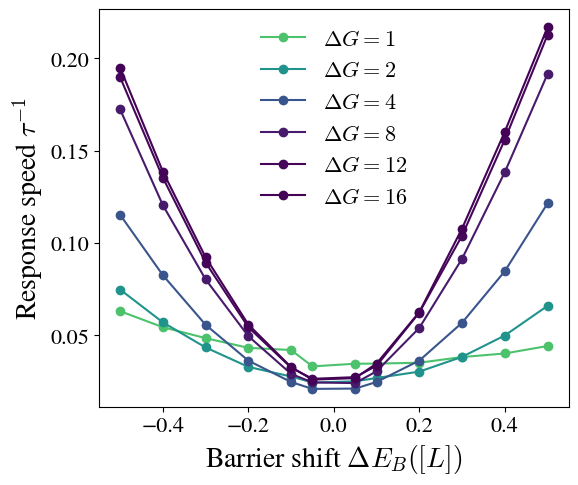

In [10]:
fig, ax = plt.subplots(figsize=(6, 5), tight_layout=True)
for _ in range(data["DeltaG"].shape[0]):
    ax.plot(
        data["eb"],
        data["speed"][_],
        "o-",
        color=virimap(np.exp(-data["DeltaG"][_] / 3)),
        label=r"$\Delta G = %.0f$" % data["DeltaG"][_],
    )
ax.legend(ncol=1)
ax.set_xlabel(r"Barrier shift $\Delta E_B([L])$")
ax.set_ylabel(r"Response speed $\tau^{-1}$")